In [1]:
import pandas as pd
from pprint import pprint
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("exercise8-West_Nile_Virus_by_County.csv")
print(df.shape)
df.head()

(1395, 5)


,Year,Week_Reported,County,id,Positive_Cases
0,2006,35,Alameda,6001,1
1,2006,33,Butte,6007,4
2,2006,34,Butte,6007,1
3,2006,35,Butte,6007,10
4,2006,36,Butte,6007,2


In [3]:
df['date'] = pd.to_datetime(df.Year, format="%Y") + pd.to_timedelta(df.Week_Reported, unit="W")
df.head()

,Year,Week_Reported,County,id,Positive_Cases,date
0,2006,35,Alameda,6001,1,2006-09-03
1,2006,33,Butte,6007,4,2006-08-20
2,2006,34,Butte,6007,1,2006-08-27
3,2006,35,Butte,6007,10,2006-09-03
4,2006,36,Butte,6007,2,2006-09-10


In [4]:
df.describe()

,Year,Week_Reported,id,Positive_Cases
count,1395.000000,1395.000000,1395.000000,1395.000000
mean,2010.881720,38.907527,6057.649462,2.772043
std,3.078304,5.791268,31.743046,3.862923
min,2006.000000,9.000000,6001.000000,1.000000
25%,2008.000000,35.000000,6029.000000,1.000000
50%,2012.000000,38.000000,6059.000000,1.000000
75%,2014.000000,43.000000,6077.000000,3.000000
max,2015.000000,53.000000,6115.000000,31.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            1395 non-null   int64         
 1   Week_Reported   1395 non-null   int64         
 2   County          1395 non-null   object        
 3   id              1395 non-null   int64         
 4   Positive_Cases  1395 non-null   int64         
 5   date            1395 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 65.5+ KB


# Number of records

Start by looking at the date ranges covered by the dataset. Note that this is different than the number of positive cases -- more on that below. We're simply looking at the distribution of the *dataset*, not the distribution of *cases*.

The first few cells plot the distribution of dates in the dataset combined, and individually year-by-year.

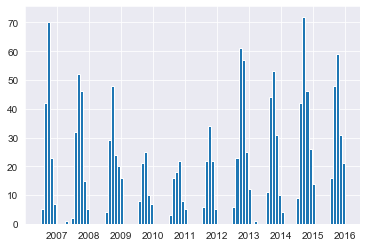

In [6]:
df.date.hist(bins=100)

Nearly all reports come in the second half of the year. We can see a slump in reports from 2010 to 2012.

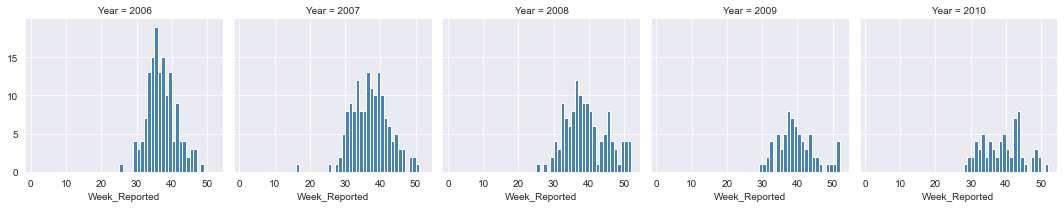

In [7]:
g = sns.FacetGrid(df[df.Year < 2011], col="Year", margin_titles=True)
bins = np.linspace(1, 52, 52)
g.map(plt.hist, "Week_Reported", color="steelblue", bins=bins);

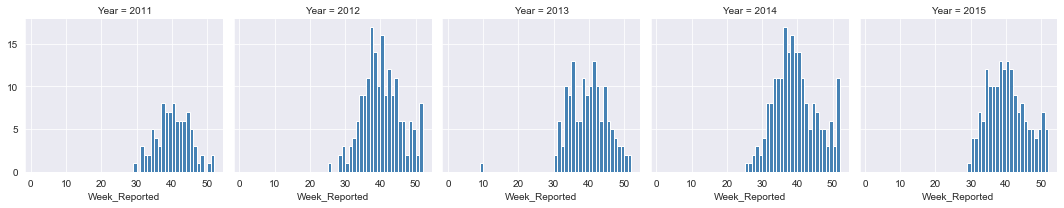

In [8]:
g = sns.FacetGrid(df[df.Year >= 2011], col="Year", margin_titles=True)
bins = np.linspace(1, 52, 52)
g.map(plt.hist, "Week_Reported", color="steelblue", bins=bins);

## Number of records by county

In [9]:
df.County.describe()

count            1395
unique             46
top       Los Angeles
freq              141
Name: County, dtype: object

In [10]:
df.County.value_counts()

Los Angeles        141
Kern               113
Stanislaus          98
Orange              94
Riverside           88
Fresno              84
San Bernardino      74
Butte               69
San Joaquin         65
Sacramento          63
Tulare              49
San Diego           44
Glenn               41
Yolo                36
Contra Costa        34
Placer              31
Sutter              27
Santa Clara         25
Merced              22
Yuba                22
Tehama              21
Madera              20
Kings               19
Shasta              18
Ventura             15
Colusa              15
Solano              10
Imperial             7
El Dorado            6
Alameda              6
Lake                 6
Marin                4
Mendocino            4
San Francisco        3
Napa                 3
Nevada               3
Santa Barbara        3
Siskiyou             2
Monterey             2
Modoc                2
Sonoma               1
Calaveras            1
San Luis Obispo      1
Mono       

In [11]:
df.County.value_counts().quantile([.9, .75, .5, .25, .1])

0.90    86.00
0.75    43.25
0.50    18.50
0.25     3.00
0.10     1.00
Name: County, dtype: float64

Many counties have few reports. We'll plot the distribution of reports by date for the top half of counties. In almost all cases the peak of records is around week 40.

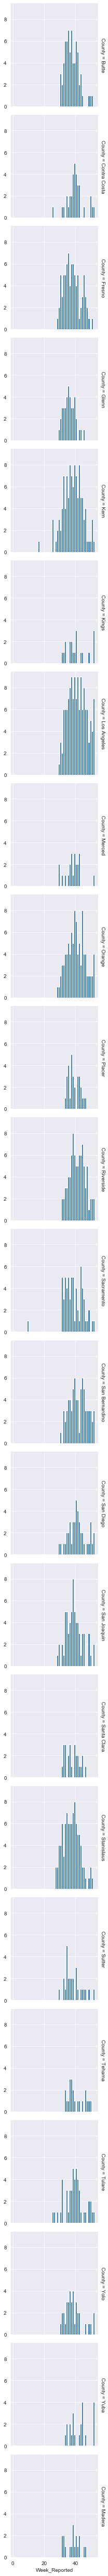

In [12]:
county_vc = df.County.value_counts()
county_mask = df.County.isin(county_vc[county_vc > 18].index.values)
g = sns.FacetGrid(df[county_mask], row="County", margin_titles=True)
bins = np.linspace(1, 52, 52)
g.map(plt.hist, "Week_Reported", color="steelblue", bins=bins);

# Number of reported cases

Now we'll look at the actual number of cases by through aggregation.

In [13]:
df.groupby(by=["Year", "Week_Reported", "County"]).Positive_Cases.sum().sort_values(ascending=False)

Year  Week_Reported  County      
2014  37             Orange          31
2015  49             Los Angeles     30
2014  41             Orange          29
                     Los Angeles     29
2015  45             Los Angeles     29
                                     ..
2012  37             Riverside        1
                     Madera           1
                     Contra Costa     1
                     Colusa           1
2006  25             Kern             1
Name: Positive_Cases, Length: 1395, dtype: int64

In [14]:
cases_by_date_df = df.groupby(by=["date"]).Positive_Cases.sum().reset_index()
cases_by_date_df

,date,Positive_Cases
0,2006-06-25,1
1,2006-07-23,4
2,2006-07-30,11
3,2006-08-06,4
4,2006-08-13,18
...,...,...
234,2015-11-26,43
235,2015-12-03,4
236,2015-12-10,40
237,2015-12-17,26


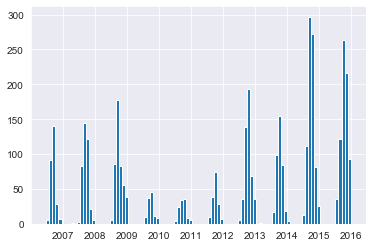

In [15]:
plt.hist(cases_by_date_df.date,
         weights=cases_by_date_df.Positive_Cases,
         bins=100);

We can see that although the number of reports is similar prior to 2010 and from 2013 onwards, the actual number of cases is evidently increasing.

In [16]:
cases_by_county_df = df.groupby(by=["County"]).Positive_Cases.sum().reset_index()
cases_by_county_df.head()
cases_by_county_df.sort_values(by="Positive_Cases", ascending=False)

,County,Positive_Cases
13,Los Angeles,1112
23,Orange,500
10,Kern,315
25,Riverside,286
39,Stanislaus,174
2,Butte,170
27,San Bernardino,170
7,Fresno,157
26,Sacramento,123
28,San Diego,108


In [17]:
cases_by_county_df.Positive_Cases.quantile([.9, .75, .5, .25, .1])

0.90    172.00
0.75     79.75
0.50     22.00
0.25      3.00
0.10      1.00
Name: Positive_Cases, dtype: float64

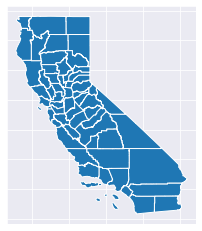

In [18]:
import geopandas as gpd
# Download shapefile from https://data.ca.gov/dataset/ca-geographic-boundaries
ca_counties = gpd.read_file("CA_Counties_TIGER2016.shp")
ax = ca_counties.plot()
ax.set_xticklabels([]);
ax.set_yticklabels([]);

In [19]:
ca_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [20]:
cases_by_county_and_year = df.groupby(["County", "Year"]).Positive_Cases.sum().reset_index()
cases_by_county_and_year = gpd.GeoDataFrame(cases_by_county_and_year)
cases_by_county_and_year.head()

,County,Year,Positive_Cases
0,Alameda,2006,1
1,Alameda,2008,1
2,Alameda,2010,1
3,Alameda,2012,2
4,Alameda,2014,1


In [21]:
from shapely.geometry import Point
counties = cases_by_county_and_year.County.value_counts().index
cases_by_county_and_year['geometry'] = Point(0, 0)
for county in counties:
    mask = cases_by_county_and_year.County == county
    centroid = ca_counties[ca_counties.NAME == county].iloc[0].geometry.centroid
    nrows = cases_by_county_and_year.loc[mask, 'geometry'].shape[0]
    cases_by_county_and_year[mask] = cases_by_county_and_year[mask].set_geometry([centroid]*nrows)
cases_by_county_and_year.sort_values(by="Positive_Cases", ascending=False).head(10)

,County,Year,Positive_Cases,geometry
136,Orange,2014,263,POINT (-13110793.018 3985544.004)
94,Los Angeles,2014,253,POINT (-13164715.738 4055952.704)
95,Los Angeles,2015,252,POINT (-13164715.738 4055952.704)
92,Los Angeles,2012,163,POINT (-13164715.738 4055952.704)
93,Los Angeles,2013,158,POINT (-13164715.738 4055952.704)
88,Los Angeles,2008,156,POINT (-13164715.738 4055952.704)
64,Kern,2007,140,POINT (-13217007.458 4210767.385)
154,Riverside,2015,125,POINT (-12912370.869 3994510.258)
137,Orange,2015,85,POINT (-13110793.018 3985544.004)
130,Orange,2008,71,POINT (-13110793.018 3985544.004)


In [22]:
cases_by_county_and_year.Year.value_counts()

2006    36
2015    31
2014    31
2013    31
2012    31
2007    30
2008    27
2011    24
2009    19
2010    18
Name: Year, dtype: int64

In [23]:
max_cases_by_county = cases_by_county_and_year.groupby(by="County").Positive_Cases.max()
max_cases_by_county.head()

County
Alameda       2
Amador        1
Butte        53
Calaveras     1
Colusa        3
Name: Positive_Cases, dtype: int64

In [24]:
sum_cases_by_county = cases_by_county_and_year.groupby(by="County").Positive_Cases.sum()
sum_cases_by_county.head()

County
Alameda        6
Amador         1
Butte        170
Calaveras      1
Colusa        15
Name: Positive_Cases, dtype: int64

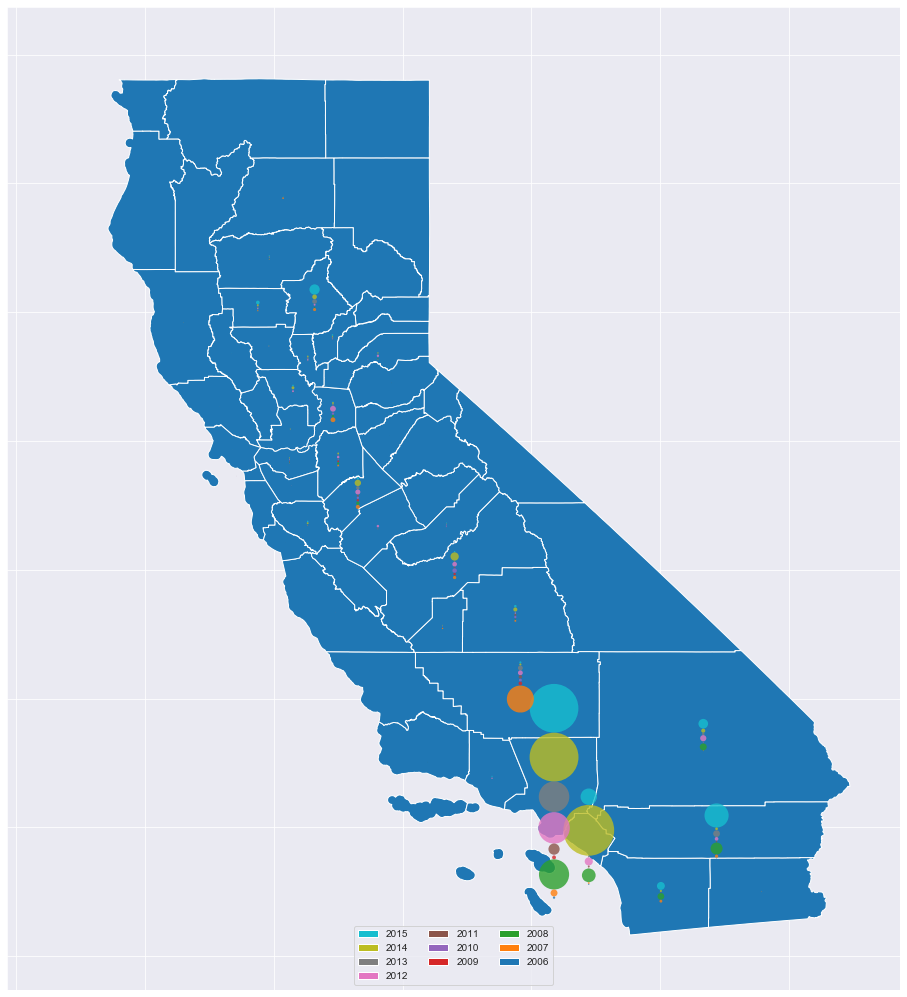

In [44]:
from matplotlib.patches import Circle
from matplotlib import cm
f, ax = plt.subplots(1, 1, figsize=(16, 20))
# f, ax = plt.subplots(1, 1, figsize=(8, 10))
centroids = ca_counties.geometry.centroid
ymargin = centroids.y.std() / 2
xmargin = centroids.x.std()
plt.ylim((centroids.y.min() - ymargin, centroids.y.max() + ymargin))
plt.xlim((centroids.x.min() - xmargin, centroids.x.max() + xmargin))
ax.set_xticklabels([])
ax.set_yticklabels([])
ca_counties.plot(ax=ax)
for idx, row in cases_by_county_and_year.iterrows():
    county, year, cases, coords = row
    x, y = coords.x, coords.y
    max_cases = max_cases_by_county[county]
    cidx = year - cases_by_county_and_year.Year.min()
    radius_multiplier = 150
    county_extent = sum_cases_by_county[county]
    mask = (cases_by_county_and_year.Year < year) & (cases_by_county_and_year.County == county)
    year_offset = cases_by_county_and_year[mask].Positive_Cases.sum()
    yoffset = (year_offset - county_extent / 2 + cases//2) * radius_multiplier * 2
    circle = Circle((x, y + yoffset),
                    facecolor=cm.tab10.colors[cidx], lw=0, radius=cases*radius_multiplier, alpha=0.8,
                    zorder=20 - cidx)
    ax.add_patch(circle)
minyear, maxyear = cases_by_county_and_year.Year.min(), cases_by_county_and_year.Year.max()
year_range = range(maxyear, minyear-1, -1)
ax.legend([Circle(0, 0, facecolor=cm.tab10.colors[year - minyear]) for year in year_range],
          list(year_range),
          ncol=3,
          loc='lower center');